# EECS 498-007/598-005 Assignment 2-3: MNIST Challenge Problem

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

**Your Answer:**   
Your NAME, #XXXXXXXX

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['two_layer_net.ipynb', 'eecs598', 'two_layer_net.py', 'linear_classifier.py', 'linear_classifier.ipynb', 'challenge_problem.ipynb', 'a2_helpers.py']
```

In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A2 folder, then '2020FA/A2'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A2'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'A2'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['challenge_problem.ipynb', 'svm_best_model.pt', 'softmax_best_model.pt', 'linear_classifier.py', 'linear_classifier.ipynb', 'nn_best_model.pt', 'two_layer_net.ipynb', 'two_layer_net.py', '__pycache__', 'eecs598']


In [3]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

## Setup Code
lets Import the functions we need to load visualize and evaluate your Neural Net

In [4]:
from eecs598.a2_challenge_problem import get_w1, get_w2, display_templates, display_w2, evaluate_MNIST, visualize_MNIST

# Instructions
For this challenge problem you are tasked with constructing a 2 layer neural net by hand which classifies hand drawn digits.

## Load and visualize the MNIST dataset
We wil be Evaluating on the test set of MNIST, a dataset containing 28x28 hand drawn digits.

You can run this cell to visualize examples from the training set. You can keep viewing new batches by re-running the cell. Take this opportunity to train your own biological neural network on MNIST digits :)

100%|██████████| 9912422/9912422 [00:00<00:00, 102327366.27it/s]


Extracting mnist_dataset/MNIST/raw/train-images-idx3-ubyte.gz to mnist_dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62537787.21it/s]


Extracting mnist_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25807394.54it/s]


Extracting mnist_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5315437.71it/s]

Extracting mnist_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_dataset/MNIST/raw



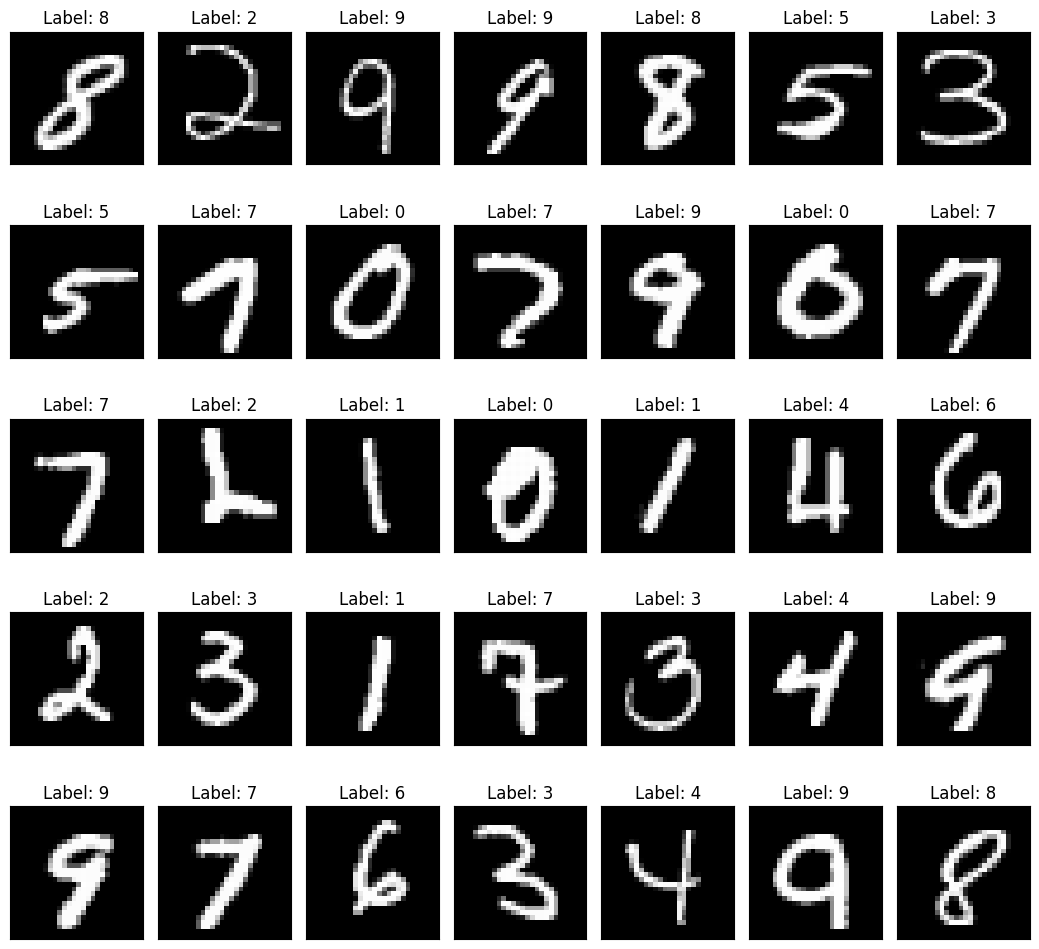

In [5]:
visualize_MNIST()

## Hand design a 2 Layer Neural Network

Using this web GUI (https://web.eecs.umich.edu/gkaul/A2_challenge_problem/) you can set the parameters of a 2 layer neural net. Instructions are on the web page, but at a high level you will hand draw the first layer templates (this is precisly what was visualized at the end Assignmnet 2-2) as well as set the weights of the second fully connected layer. **Make sure to download and save your model when you're done, Additionally upload it to the Assignment 2 folder as** `hand_drawn_weights.jpeg`.

the network has the following architecture:

    input (28x28 flattened) - fully connected layer (734->7) - ReLU - fully connected layer(7->10) - softmax

The output of the network are the scores for each class - in this specific case they correspond to the actual label of each digit(0-9).

## Load the Weights of your 2 layer neural net
Upload your `hand_drawn_weights.jpeg` that you downloaded from the webpage and set the path below

In [6]:
path_to_weights = 'path/to/hand_drawn_weights.jpeg'

## Visualize your first layer features (resized as 28x28)
These templates extract features from an input digit

In [7]:
w1 = get_w1(path_to_weights)
display_templates(w1)

error: ignored

## Visualize your second layer
The second layer will define linear combinations of our h1 representation

In [ ]:
w2 = get_w2(path_to_weights)
display_w2(w2)

## Testing our NN on MNIST

Now that you have designed and loaded your two layer neural network, it's time to evaluate our classifier on the test set.

Simple solutions should be able to exceed ~20% accuracy. While this is relitivly low for MNIST (the exact same model architecture can achive ~92% when trained end to end using SGD), the goal of this problem is to help you think about how a 2 layer neural network can approximate an arbitrary function.

you will recieve one point for every 2% you achive above 18% - we will grade using the following breakdown:

| Accuracy | pts |
| --- | --- |
| 18-20%  | 1/5  |
| 20-22%  | 2/5  |
| 22-24%  | 3/5  |
| 24-26%  | 4/5  |
| 26%+   | 5/5  |

In [ ]:
accuracy, correct_digits, incorrect_digits = evaluate_MNIST(w1,w2)
print('your network scored',(accuracy)*100,'% on the MNIST test set')

## This portion of the notebok will help you characterize your networks preformance

Recall that a loss function measures the discrepency between our models prediction and the ground truth. When we evaluated your solution, we computed the cross entropy loss of each prediction as defined by `torch.nn.CrossEntropyLoss()`


## Visualize lowest loss examples

These are examples that your model classified correctly. The following list `correct_digits` is sorted by loss (lowest first), this means that your model's predicted distribution was close to the actual one hot distribution for these examples. These are examples that your model doesn't have difficulty classifying.


In [ ]:
# you can change the indices to display more digits or different digits
display_templates(correct_digits[:10])

## Visualize highest loss examples

These are examples that your model classified incorrectly. The following list `incorrect_digits` is sorted by loss (highest first), this means that your model's predicted distribution was far from the actual one hot distribution for these examples. Theese are examples that your model had the most difficulty classifying. Thinking about how your network handles these examples will give you a good starting point for improving your model

In [ ]:
#you can change the indices to display more digits or different digits
display_templates(incorrect_digits[:10])

# Submit Your Work
After completing all 3 notebooks for this assignment (`linear_classifier.ipynb`, `two_layer_net.ipynb`,  and this notebook,`challenge_problem.ipynb` ), run the following cell to create a `.zip` file for you to download and turn in. **Please MANUALLY SAVE every `*.ipynb` and `*.py` files before executing the following cell:**

In [ ]:
from eecs598.submit import make_a2_submission

# TODO: Replace these with your actual uniquename and umid
uniquename = None
umid = None
make_a2_submission(GOOGLE_DRIVE_PATH, uniquename, umid)